In [ ]:
import numpy as np
import matplotlib.pylab as plt

#Volcado de datos
A diferencia de los datasets anteriores, el único "problema" que presenta este es la combinación de columnas con datos númericos y columnas con texto, por lo que podremos cargar los datos directamente.

En este caso, lo que nos interesará estudiar es la evolución del gasto público en porcentaje del PIB por paises y por años, usando distintos indicadores. Para ello, guardaremos en la variable data los datos sobre año y gasto público, que se encuentran en las columnas 8 y 9 de nuestro dataset, y guardaremos en la variable col_paises la columna con los nombres de los paises, que se encuetran en la columna 7. En ambos casos nos saltearemos la primera fila, que contiene los nombres de las columnas, pero en el segundo tendremos que hacer dtype=str (ya que los datos son texto).

In [ ]:
data=np.loadtxt('./data/gov_10a_exp_page_linear.csv', delimiter=",", usecols=(8,9), skiprows=1)
print(data)

col_paises=np.loadtxt('./data/gov_10a_exp_page_linear.csv', delimiter=",", usecols=(7), skiprows=1, dtype=str)
print(col_paises)

Siguiendo la misma idea que en el notebookB, creamos un diccionario que nos diga los índices de la filas en las que encontramos cada pais:

In [ ]:
#Listado de paises
paises=np.unique(col_paises)
#Diccionario con los indices que corresponde a cada pais
ind_dicc={}
for i in range(len(paises)):
  ind_dicc[paises[i]]=np.where(col_paises==paises[i])
print(ind_dicc)


{'AT': (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),), 'BE': (array([10, 11, 12, 13, 14, 15, 16, 17, 18]),), 'BG': (array([19, 20, 21, 22, 23, 24, 25, 26, 27]),), 'CY': (array([28, 29, 30, 31, 32, 33, 34, 35, 36]),), 'CZ': (array([37, 38, 39, 40, 41, 42, 43, 44, 45]),), 'DE': (array([46, 47, 48, 49, 50, 51, 52, 53, 54]),), 'DK': (array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),), 'EA19': (array([65, 66, 67, 68, 69, 70, 71, 72, 73]),), 'EE': (array([74, 75, 76, 77, 78, 79, 80, 81, 82]),), 'EL': (array([83, 84, 85, 86, 87, 88, 89, 90, 91]),), 'ES': (array([ 92,  93,  94,  95,  96,  97,  98,  99, 100]),), 'EU27_2020': (array([101, 102, 103, 104, 105, 106, 107, 108, 109]),), 'FI': (array([110, 111, 112, 113, 114, 115, 116, 117, 118]),), 'FR': (array([119, 120, 121, 122, 123, 124, 125, 126, 127]),), 'HR': (array([128, 129, 130, 131, 132, 133, 134, 135, 136]),), 'HU': (array([137, 138, 139, 140, 141, 142, 143, 144, 145]),), 'IE': (array([146, 147, 148, 149, 150, 151, 152, 153, 154]),), 'IS': (arra

#Análisis de los datos
El primer indicador que estudiaremos en este caso es la media y desviación típica del gasto público, en unidades de porcentaje del PIB, por paises:

In [ ]:
#Media y desviacion del gasto puiblico por paises del 2012 a 2021
print("En unidades de porcentaje del PIB:")
for i in range(len(paises)):
  media=round(np.mean(data[ind_dicc[paises[i]],1]), 2)
  desv=round(np.std(data[ind_dicc[paises[i]],1]), 2)
  print(f'{paises[i]} tiene una media de gasto de {media} y una desviación típica de {desv}')

En unidades de porcentaje del PIB:
AT tiene una media de gasto de 51.58 y una desviación típica de 2.66
BE tiene una media de gasto de 54.47 y una desviación típica de 2.39
BG tiene una media de gasto de 37.72 y una desviación típica de 3.13
CY tiene una media de gasto de 41.71 y una desviación típica de 3.81
CZ tiene una media de gasto de 42.18 y una desviación típica de 2.39
DE tiene una media de gasto de 45.21 y una desviación típica de 2.0
DK tiene una media de gasto de 53.1 y una desviación típica de 2.62
EA19 tiene una media de gasto de 48.86 y una desviación típica de 2.01
EE tiene una media de gasto de 39.8 y una desviación típica de 2.22
EL tiene una media de gasto de 53.21 y una desviación típica de 5.14
ES tiene una media de gasto de 44.81 y una desviación típica de 3.5
EU27_2020 tiene una media de gasto de 48.49 y una desviación típica de 1.97
FI tiene una media de gasto de 55.48 y una desviación típica de 1.61
FR tiene una media de gasto de 57.12 y una desviación típica de

También nos interesará saber cual es la evolución de la media y la desviación típica del gasto de todos los paises en los años:

In [ ]:
#Media y desviacion tipica del gasto por años
lista_anyos=np.unique(data[:,0])
media_anual=[]
for i in lista_anyos:
  ind_anyo=np.where(data[:,0]==i)
  media=round(np.mean(data[ind_anyo,1]), 2)
  media_anual.append(media)
  desv=round(np.std(data[ind_anyo,1]), 2)
  print(f'En el año {int(i)} hubo una media de gasto de {media} y una desviación típica de {desv}')

En el año 2012 hubo una media de gasto de 46.65 y una desviación típica de 6.33
En el año 2013 hubo una media de gasto de 47.07 y una desviación típica de 7.09
En el año 2014 hubo una media de gasto de 46.56 y una desviación típica de 6.15
En el año 2015 hubo una media de gasto de 45.53 y una desviación típica de 6.55
En el año 2016 hubo una media de gasto de 44.23 y una desviación típica de 6.76
En el año 2017 hubo una media de gasto de 43.35 y una desviación típica de 6.73
En el año 2018 hubo una media de gasto de 43.6 y una desviación típica de 6.27
En el año 2019 hubo una media de gasto de 43.49 y una desviación típica de 6.38
En el año 2020 hubo una media de gasto de 50.09 y una desviación típica de 6.85
En el año 2021 hubo una media de gasto de 51.13 y una desviación típica de 3.84


Veamos el gráfico de este segundo indicador:

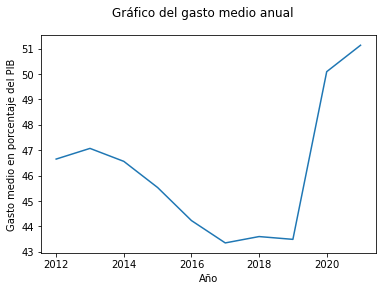

In [ ]:
#Gráfico de la evolucion del gasto medio anual
fig, ax=plt.subplots()
ax.set_xlabel("Año")
ax.set_ylabel("Gasto medio en porcentaje del PIB")
plt.suptitle("Gráfico del gasto medio anual")
ax.plot(lista_anyos, media_anual)

Ahora queremos saber cuáles fueron los cuartiles del gasto público por año:

In [ ]:
#Evolucion de los cuartiles de gasto
Q1=[]
mediana=[]
Q3=[]
for i in lista_anyos:
  ind_anyo=np.where(data[:,0]==i)
  q1=round(np.percentile(data[np.where(data[:,0]==i),1], 25), 2)
  q2=round(np.percentile(data[np.where(data[:,0]==i),1], 50), 2)
  q3=round(np.percentile(data[np.where(data[:,0]==i),1], 75), 2)
  Q1.append(q1)
  mediana.append(q2)
  Q3.append(q3)
  print(f'Los cuartiles en el año {int(i)} fueron: Q1={q1}  Q2={q2}  Q3={q3}')


Los cuartiles en el año 2012 fueron: Q1=42.15  Q2=47.7  Q3=50.3
Los cuartiles en el año 2013 fueron: Q1=41.9  Q2=46.0  Q3=51.3
Los cuartiles en el año 2014 fueron: Q1=42.6  Q2=46.3  Q3=50.75
Los cuartiles en el año 2015 fueron: Q1=40.5  Q2=45.7  Q3=49.8
Los cuartiles en el año 2016 fueron: Q1=39.6  Q2=44.8  Q3=49.4
Los cuartiles en el año 2017 fueron: Q1=39.1  Q2=44.2  Q3=48.65
Los cuartiles en el año 2018 fueron: Q1=40.2  Q2=43.5  Q3=48.45
Los cuartiles en el año 2019 fueron: Q1=40.05  Q2=43.3  Q3=48.2
Los cuartiles en el año 2020 fueron: Q1=45.9  Q2=50.8  Q3=54.0
Los cuartiles en el año 2021 fueron: Q1=48.7  Q2=50.8  Q3=53.4


Veamos el gráfico de este tercer indicador:

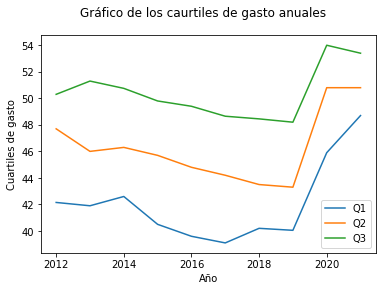

In [ ]:
#Grafico de la evolucion temporal de los cuartiles
fig, ax=plt.subplots()
ax.set_xlabel("Año")
ax.set_ylabel("Cuartiles de gasto")
plt.suptitle("Gráfico de los caurtiles de gasto anuales")
ax.plot(lista_anyos, Q1, label="Q1")
ax.plot(lista_anyos, mediana, label="Q2")
ax.plot(lista_anyos, Q3, label="Q3")
ax.legend()
plt.show()

Finalmente, calcularemos el gasto máximo y mínimo de cada país, así como el año en que se dieron:

In [ ]:
#Gasto max y min por pais y anyo en que se dio
lista_anyo_max=[]
lista_anyo_min=[]
for i in range(len(paises)):
  max=round(np.max(data[ind_dicc[paises[i]],1]), 2)
  anyo_max=data[np.where(data[ind_dicc[paises[i]][0],1]==max),0][0]
  lista_anyo_max.append(anyo_max)
  min=round(np.min(data[ind_dicc[paises[i]],1]), 2)
  anyo_min=data[np.where(data[ind_dicc[paises[i]][0],1]==min),0][0]
  lista_anyo_min.append(anyo_min)
  print(f'{paises[i]} tuvo su gasto máximo en: {anyo_max} y fue de: {max}')
  print(f'{paises[i]} tuvo su gasto mínimo en: {anyo_min} y fue de: {min}\n')

Veamos cuantos paises tuvieron su gasto máximo en cada año:

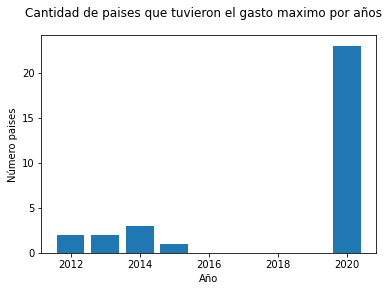

In [ ]:
#Calculo de la frecuencia de año para gasto maximo
fr_max=np.unique(lista_anyo_max, return_counts=True)

#Grafico de cuantos paises tuvieron su gasto max en ese anyo
fig, ax=plt.subplots()
ax.set_xlabel("Año")
ax.set_ylabel("Número paises")
plt.suptitle("Cantidad de paises que tuvieron el gasto máximo por años")
plt.bar(fr_max[0], fr_max[1], label="máximo")
plt.show()